# Chapter 10. Dimension Reduction 
- PCA
- AutoEncoder

## 10-1. Principal Component Analysis (PCA)

### 10-1-1. Motivation of PCA
- Let $D = \{mathbf{x}^{(i)} \in R^p\}$
    * if dimension $d$ is very high, it causes several problems
        * computation time
        * storage space
        * prediction performance
        * ...
    * can we have a more concise representation of $D$ in a lower dimension?
        * dimension reduction, dimensionality reduction

- Principal Component Analysis (PCA) 
    - to find a set of vectors (principal components) $B = \{\mathbf{v}_k\in R^p; k=1..c\}$
        * hopefully, $B$ explains $D$ well even if $c \ll p$
        * $B$ is orthonormal : $\mathbf{v}_k \perp \mathbf{v}_j \text{ if } k \ne j$, $|\mathbf{v}_k| = 1$

- for simplicity, we assume that $\bar{\mathbf{x}} = \text{mean}(D)=0$
    - this assumption can be easily met by preprocessing 
        * centering (subtracting mean) : $\mathbf{x}^{(i)} - \mathbf{\bar{x}}; i=1..n$

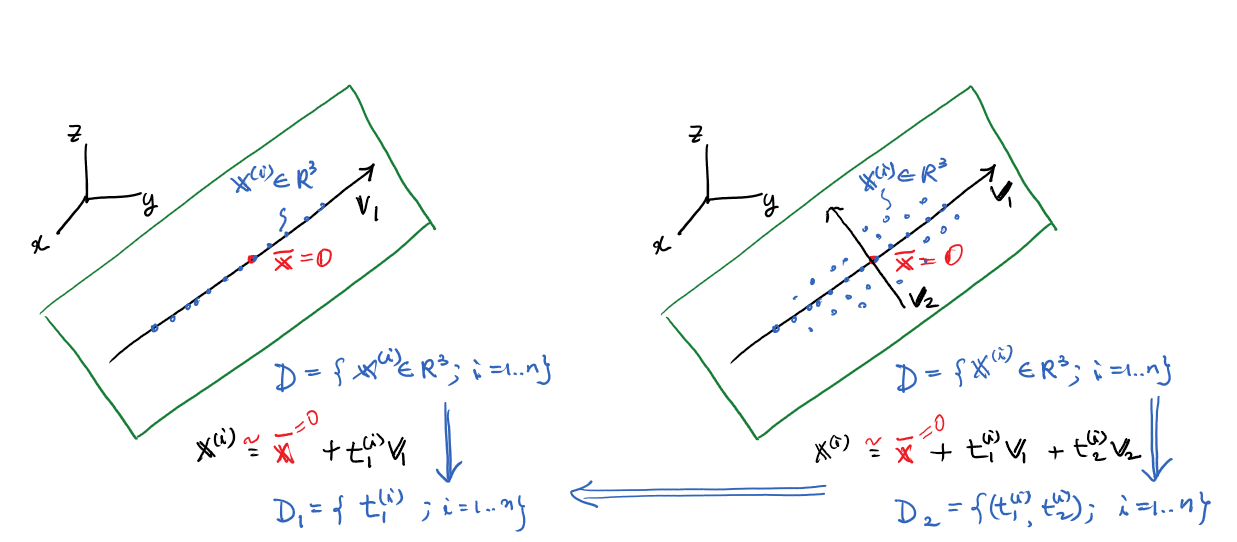

## 10-1-2. Procedure of PCA

### PCA (intuitive) 
- find the first component
    * find a unit vector $\mathbf{v}_1 \in R^p$ along which $D$ has the largest variance
        * $D_1(\mathbf{v}) = \{t^{(i)}_1; i=1..n\}$, where $t^{(i)}_1 = \mathbf{x}^{(i)} \cdot \mathbf{v}$
        * $\mathbf{v}_1 = \arg \max_{|\mathbf{v}|=1} \text{var} (D_1(\mathbf{v}))$
            * $\text{var} \left(D_1(\mathbf{v})\right) = \sum_i \left( t^{(i)}_1\right)^2 = \sum_i \left(\mathbf{x}^{(i)} \cdot \mathbf{v}\right)^2$
                * note that $\sum_i t^{(i)}_1 = 0$ since $D$ has zero mean 
- find the second component
    * find a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$ along which $D$ has the largest variance
- find the third component, and so forth ...

### PCA (how to compute)
- PCA is done by finding eigenvectors of $X^TX$, where $X = [\mathbf{x}^{(1)} ... \mathbf{x}^{(n)}]^T$ 
    * $X$ : $n \times p$ matrix 
    * $X^TX$ : $p \times p$ matrix 
    * eigenvectors  of $X^TX$ (and their corresponding eigenvalues) can be found by SVD (singular value decomposition)
        * "Data science meets linear algebra in the SVD" -- Gilbert Strang, the author of "Linear Algebra" textbook
- the first component = the eigenvector with the largest eigenvalue
    * $\mathbf{v}_1 = \arg \max_{|\mathbf{v}|=1} \text{var} (D_1(\mathbf{v})) $
    * $\mathbf{v}_1 = \arg \max_{|\mathbf{v}|=1} \sum_i \left(\mathbf{x}^{(i)} \cdot \mathbf{v}\right)^2 $
    * $\mathbf{v}_1 = \arg \max_{|\mathbf{v}|=1} \Arrowvert X \mathbf{v}\Arrowvert^2 = \arg \max_{|\mathbf{v}|=1} \mathbf{v}^TX^TX \mathbf{v} =  \arg \max_{\mathbf{v}} \frac{\mathbf{v}^TX^TX \mathbf{v}}{\mathbf{v}^T\mathbf{v}}$
    *  $\mathbf{v}_1$ : the eigenvector with the largest eigenvalue 
- find the second component = the eigenvector with the second largest eigenvalue
- ...
- Let $(\mathbf{v}_k, \lambda_k)$ : $k$-th eigen-pair (eigenvector, eigenvalue) of $X^TX$ , where $\lambda_1 < \lambda_2 < ... < \lambda_p$
    * $\mathbf{v}_k$ : $k$-th principal component
        * $X^TX \mathbf{v}_k = \lambda_k \mathbf{v}_k$  
    * $\lambda_k =  \mathbf{v}_k^TX^TX \mathbf{v}_k = \sum_i \left(\mathbf{x}^{(i)} \cdot \mathbf{v}_k\right)^2$ : variance along the $k$-th principal component

### 10-1-3. PCA transform and inverse-transform
- transform with $c$ principal components : $\mathbf{x}^{(i)} \mapsto \mathbf{z}^{(i)}=\left(t^{(i)}_1, .., t^{(i)}_c\right)$
    * $t^{(i)}_k = \mathbf{v}_k \cdot \mathbf{x}^{(i)}, k = 1..c$
- inverse transform : $\mathbf{z}^{(i)}=\left(t^{(i)}_1, .., t^{(i)}_c\right) \mapsto \mathbf{x}^{(i)}$
    * $\mathbf{x}^{(i)} \approx \sum_{k=1}^c t^{(i)}_k \mathbf{v}_k = \mathbf{z}^{(i)} V$, where $V = [\mathbf{v}_1 ... \mathbf{v}_c]^T$

### 10-1-4. PCA with sklearn
- sklearn.decomposition.PCA
- pca = PCA(n_comp) : creates a PCA model
    * n_comp : # of components to compute
        * n_comp = 2 : compute upto 2 components
        * n_comp is not given : compute all components
        * n_comp = $\alpha$, where 0 < $\alpha$ < 1 : computes PCs which explains $\alpha$*100 % of total variance 
- pca.fit (X) : compute principal components of X
    * pca.n_components_ : # of components to computed
    * pca.components_ : principal components computed
    * pca.explained_variance_ : variance explained by each PC ($\lambda_k$)
    * pca.explained_variance_ratio_ : $ r_k = \frac{\lambda_k}{\sum_l\lambda_l}$
    * pca.mean : mean of original data
- Z = pca.transform (X) : transform X to Z
- Z = pca.fit_transform(X) : fit and transform
- Xp = pca.inverse_transform(Z) : inverse transform Z to X

### 10-1-5. PCA Example : Iris dataset

In [181]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
Y_iris = iris['species']

In [183]:
name_to_int = {'setosa':0, 'versicolor':1, 'virginica':2}
def map_name_to_int(Y):
    Yi = Y.map(name_to_int)
    return Yi

def plot_iris_2d(X1, X2, Yint, c1=None, c2=None):
    plt.scatter(X1, X2, c=Yint, edgecolor='black', s=20)
    plt.xlabel(c1)
    plt.ylabel(c2)

#### Feature normalization (optional)
- recommended if feature scales are different
- StandardScaler : $ \frac{\left( \mathbf{x}^{(i)} - \mu_{\mathbf{x}}\right)}{\sigma_{\mathbf{x}}} $
    - $\mu_{\mathbf{x}}$ : mean of $\mathbf{x}^{(i)}$
    - $\sigma_{\mathbf{x}}$ : std.dev. of $\mathbf{x}^{(i)}$

In [184]:
# feature normalization
from sklearn import preprocessing
std = preprocessing.StandardScaler()
X_std = std.fit_transform(X_iris)
# X_std = X_iris.values  # no normalization

#### plotting iris dataset 

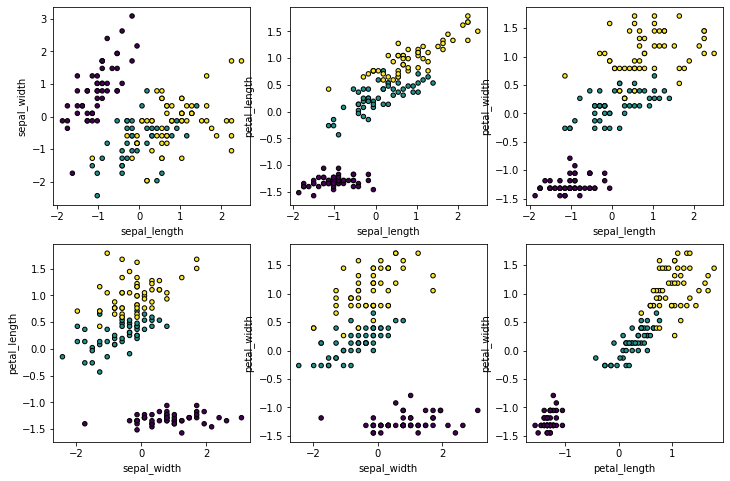

In [185]:
plt.figure(figsize=(12,8))
k = 0
Yint = map_name_to_int(Y_iris)
for i in range(3):
    for j in range(i+1,4):
        k += 1
        plt.subplot(2, 3, k)
        plot_iris_2d(X_std[:,i], X_std[:,j], Yint, X_iris.columns[i], X_iris.columns[j])

#### Principal components
- $\mathbf{v}_1$ = [ 0.521 -0.269  0.580  0.564], $\lambda_1$ = 2.938, $r_1$ = 0.729
- $\mathbf{v}_2$ = [ 0.377  0.923  0.024  0.066], $\lambda_2$ = 0.920, $r_2$ = 0.228
- $\mathbf{v}_3$ = [-0.719  0.244  0.142  0.634], $\lambda_3$ = 0.147, $r_3$ = 0.036
- $\mathbf{v}_4$ = [-0.261  0.123  0.801 -0.523], $\lambda_4$ = 0.020, $r_4$ = 0.005

In [186]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)
print ('principal components')
print (pca.components_)
print ('lambda (explained var.) = ', pca.explained_variance_)
print ('explained var. ratio    = ', pca.explained_variance_ratio_)

principal components
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
lambda (explained var.) =  [2.93808505 0.9201649  0.14774182 0.02085386]
explained var. ratio    =  [0.72962445 0.22850762 0.03668922 0.00517871]


#### plot 2d coordinates of first two principal components

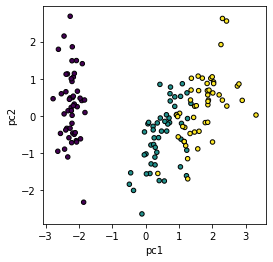

In [187]:
plt.figure(figsize=(4,4))
Z = pca.transform(X_std)
plot_iris_2d (z[:,0], Z[:,1], Yint, 'pc1', 'pc2')

#### classification with PCs
- Logistic regression with original 4 features  : accuracy = 0.973
- Logistic regression with PC features
    * 1 PC feature : accuracy = 0.926
    * 2 PC features: accuracy = 0.933
    * 3 PC features: accuracy = 0.973
    * 4 PC features: accuracy = 0.973

In [188]:
from sklearn.linear_model import LogisticRegression
clf_softmax = LogisticRegression(multi_class='multinomial', max_iter=200)

clf_softmax.fit(X_std, Y_iris)
print(f"LogReg w/ all 4 features,  accuracy = {clf_softmax.score(X_std, Y_iris)}")

LogReg w/ all 4 features,  accuracy = 0.9733333333333334


In [13]:
for k in range(4):
    clf_softmax.fit(Z[:,:k+1], Y_iris)
    print(f"LogReg w/ {k+1} PCs,  accuracy = {clf_softmax.score(Z[:,:k+1], Y_iris)}")

LogReg w/ 1 PCs,  accuracy = 0.9266666666666666
LogReg w/ 2 PCs,  accuracy = 0.9333333333333333
LogReg w/ 3 PCs,  accuracy = 0.9733333333333334
LogReg w/ 4 PCs,  accuracy = 0.9733333333333334


### 10-1-6. Compressing MNIST data with PCA

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [189]:
from sklearn.model_selection import train_test_split
X = mnist.data  # 70000 images
Xn = X.values
Y = mnist.target  # 70000 labels

In [190]:
def plot_mnist_image(X, title="", ax=None):
    if ax is None:
        ax = plt
    ax.imshow(X.reshape(28,28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255))
    ax.title(title)

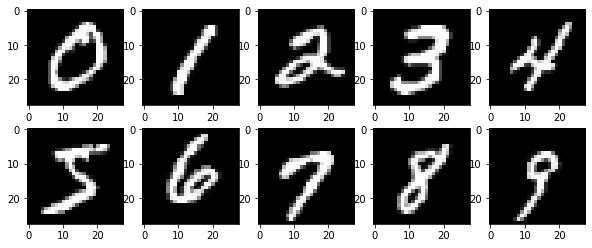

In [191]:
# plot sample images
plt.figure(figsize=(10,4))
f = [1, 3, 5, 7, 9, 0, 13, 15, 17, 19]
for k in range(10):
    plt.subplot(2, 5, k+1)
    plot_mnist_image(Xn[f[k]])

#### Computing PCA (full components)

In [192]:
from sklearn.decomposition import PCA

pca_full = PCA()
Z_full = pca_full.fit_transform(X)

#### Plot cumulative explained variance
- note that 100 PCs explain more than 90% of total variance

Text(0, 0.5, 'Cumulative_explained_variance')

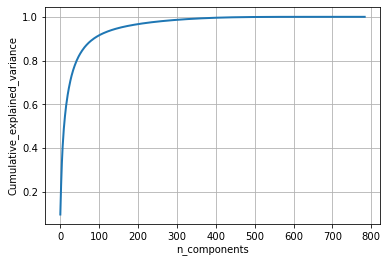

In [193]:
cum_exp_var = np.cumsum(pca_full.explained_variance_ratio_)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_exp_var, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')

#### Display PCs
- $\mathbf{v}_k$ : pca.components_[k]
- we can plot $\mathbf{v}_k$ as an image


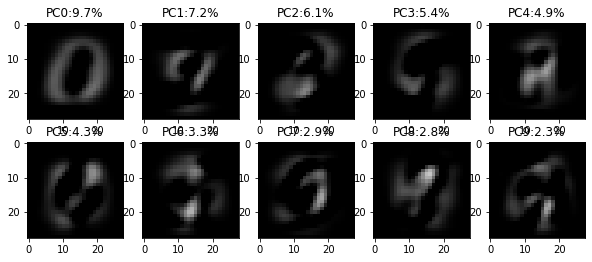

In [194]:
plt.figure(figsize=(10,4))
for k in range(10):
    plt.subplot(2, 5, k+1)
    PCk = pca_full.components_[k] * 1000
    plot_mnist_image(PCk, f'PC{k}:{pca_full.explained_variance_ratio_[k] * 100:.1f}%')

#### Partial inverse transform
- using `d` principal components to recover data from $Z_d$
- $\mathbf{x}^{(i)} \approx \sum_{k=1}^d t^{(i)}_k \mathbf{v}_k = \mathbf{z}^{(i)} V_d$, 
    * where $V_d = [\mathbf{v}_1 ... \mathbf{v}_d]^T$
- $X \approx Z_d V_d$,
    * where $Z_d = [\mathbf{z}^{(i)} ... \mathbf{z}^{(n)}]^T$
    *  and  $X = [\mathbf{x}^{(i)} ... \mathbf{x}^{(n)}]^T$

#### Reconstruction of images from PCA results
- as more components are used, recovered image gets closer to the original

In [198]:
def partial_inv_tranform(pca, Z, n_comp):
    Xr = np.dot(Z[:n_comp], pca.components_[:n_comp]) + pca.mean_
    # Xr = np.zeros(pca.components_[0].size)
    # for k in range(n_comp):
    #     Xr += Z[k] * pca.components_[k]
    # Xr += pca.mean_
    return Xr

In [199]:
def recover_and_plot(pca, Z, nclist):
    n = len(nclist)
    for k, nc in enumerate(nclist):
        Xr = partial_inv_tranform(pca, Z, nc)
        plt.subplot(1, n+1, k+1)
        plot_mnist_image(Xr, f'{nc}-comp')

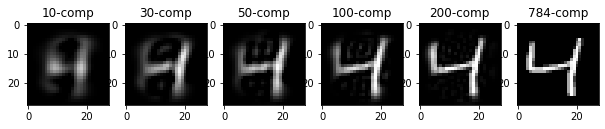

In [200]:
nclist = [10, 30, 50, 100, 200, 784]
plt.figure(figsize=(12,2))
d = 2
recover_and_plot(pca_full, Z_full[d], nclist)

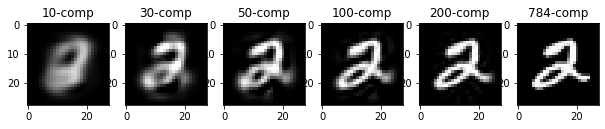

In [201]:
plt.figure(figsize=(12,2))
d = 5
recover_and_plot(pca_full, Z_full[d], nclist)

#### Softmax classification (Multinomial logistic regresion)
- Softmax classification using full features (original image)
    * accuracy = 0.916
    * computation time $\approx$ 80s

- Softmax classification using 128 PCs
    * accuracy = 0.914
    * computation time $\approx$ 3s

In [203]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

mnist_softmax = LogisticRegression(multi_class='multinomial', max_iter=1000)
import time

stime = time.time()
X_trn, X_val, Y_trn, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42)
mnist_softmax.fit(X_trn, Y_trn)
acc_org = mnist_softmax.score(X_val, Y_val)
etime = time.time()
print (f'Log.Reg with original data, accuracy = {acc_org:.3f}, time = {etime-stime:.2f}')

Log.Reg with original data, accuracy = 0.916, time = 88.32


In [204]:
k = 128
Z_red = Z_full[:,:k]
stime = time.time()
Z_trn, Z_val, Y_trn, Y_val = train_test_split(Z_red, Y, test_size=0.25, random_state=42)

mnist_softmax = LogisticRegression(multi_class='multinomial')
mnist_softmax.fit(Z_trn, Y_trn)
acc_100 = mnist_softmax.score(Z_val, Y_val)
etime = time.time()
print (f'Log.Reg with dim-{k} data, accuracy = {acc_100:.3f}, time = {etime-stime:.2f}')

Log.Reg with dim-128 data, accuracy = 0.914, time = 3.03


## 10-2. Dimension reduction with AutoEncoder

- AutoEncoder : a neural net for efficient encoding of input data
    - encoding = (compressed) representation of input data
        * latent variable
    - dim(input) >> dim(encoding)
    - unsupervised learning
        * input data itself is used as the __label__
    - encoder + decoder
        * __encoder__ : $ \mathbf{X} \text{(input)} \mapsto \mathbf{Z} \text{(encoding)} $
        * __decoder__ : $ \mathbf{Z} \text{(encoding)} \mapsto \mathbf{Y} \text{(recovered)}$
        * train __encoder__ and __decoder__ so as to $X \approx Y$
        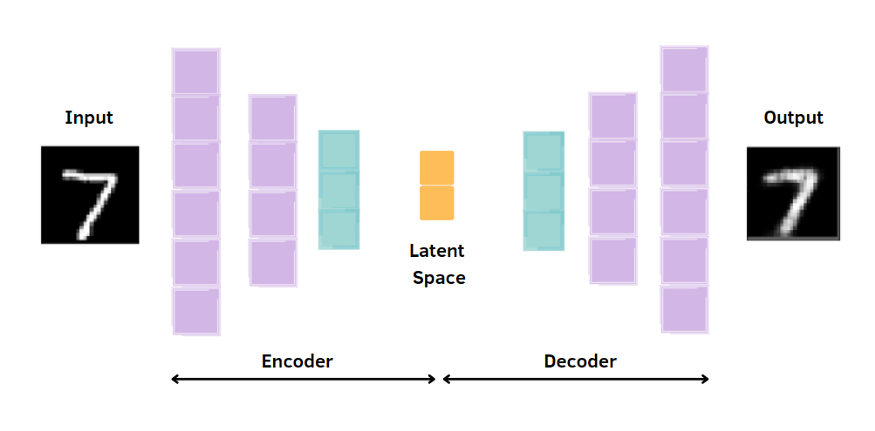

In [27]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import time


### 10-2-1. Using MLP encoder-decoder : MNIST example
- __MLP_encoder__ 
    * 4 fully connected linear layers
        * $X$(784) $\to$ [linear][ReLU] (256) $\to$ [linear][ReLU] (128) $\to$ [linear][ReLU] (64) $\to$ [linear] $\to$ $Z$(32)
- __MLP_decoder__ 
    * 4 fully connected linear layers (reversed order of encoder)
        * $Z$(32) $\to$ [linear][ReLU] (64) $\to$ [linear][ReLU] (128) $\to$ [linear][ReLU] (256) $\to$ [linear] $\to$ $Y$(784)

In [28]:
class MLP_encoder(nn.Module):
    def __init__(self):
        super().__init__()
        # encoder
        self.enc1 = nn.Linear(784, 256)
        self.enc2 = nn.Linear(256, 128)
        self.enc3 = nn.Linear(128, 64)
        self.enc4 = nn.Linear(64, 32)

    def forward(self, x):
        x = x.reshape(x.size(0), -1)
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = self.enc4(x)
        return x

In [29]:
class MLP_decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.dec1 = nn.Linear(32, 64)
        self.dec2 = nn.Linear(64, 128)
        self.dec3 = nn.Linear(128, 256)
        self.dec4 = nn.Linear(256, 784)

    def forward(self, x):
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = self.dec4(x)
        x = x.reshape((-1,1,28,28))
        return x

### 10-2-2. AutoEncoder class for MNIST data
- encoder, decoder
- fit () : train encoder and decoder
    - parameters in encoder and decoder are trained together
    - z = encode(x), y = decode(z)
        * dim(z) = 32
    - loss = MSE (x, y)

In [30]:
class AutoEncoder:
    def __init__(self, encoder, decoder):
        super().__init__()
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.encoder = encoder
        self.encoder.to(self.device)
        self.decoder = decoder
        self.decoder.to(self.device)
        self.prepare_optimizer()

    def prepare_optimizer(self, lr=0.001, wd=0.001):
        p = list(self.encoder.parameters())+ list(self.decoder.parameters())
        # self.opt = torch.optim.SGD(p, lr=lr, momentum=0.9, weight_decay=wd)
        self.opt = torch.optim.Adam(p, lr=lr, weight_decay=wd)
        self.loss_fn = nn.MSELoss()
        return self.opt

    def prepare_data(self, batch_size=128):
        # trans : pipeline 1) convert to Tensor, 2) normalize to standard normal
        mean = 0.1307
        std = 0.3081
        trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])
        train_set = datasets.MNIST(root='data', train=True, transform=trans, download=True)
        test_set = datasets.MNIST(root='data', train=False, transform=trans, download=True)
        self.train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
        self.test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)
        self.batch_size = batch_size
        self.one_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


    def train(self):
        self.encoder.train()
        self.decoder.train()

    def eval(self):
        self.encoder.eval()
        self.decoder.eval()

    def fit_epoch(self):
        self.train()
        total_step = len(self.train_loader)
        incorrect = 0
        b = self.batch_size

        for i, (X, Y) in enumerate(self.train_loader):
            X = X.to(self.device)

            # Forward pass
            Z = self.encoder(X)
            XX = self.decoder(Z)

            # Compute loss
            loss = self.loss_fn(X, XX)

            # Backprop
            self.opt.zero_grad()
            loss.backward()
            self.opt.step()

            # Track loss
            loss_val = loss.item()
            self.loss_list.append(loss_val)
            if (i+1) % 100 == 0 or (i+1)==total_step:
                print(f'Step [{i+1}/{total_step}], Loss: {loss_val:.4f}')

    def fit(self, n_epochs=10):
        self.loss_list = []
        for epoch in range(n_epochs):
            print ("Epoch %d / %d"%(epoch+1, n_epochs))
            self.fit_epoch()
        plt.plot(self.loss_list)

    def forward(self, x):
        x = x.reshape((1,1,28,28))
        z = self.encoder(x)
        y = self.decoder(z)
        return z, y

### 10-2-3. Testing encoder and decoder
- AutoEncoder with MLP
- sample an image X from test set of MNIST
- z = encode(x)
    * dim(z) = 32
- y = decode(z)
- plot x and y for comparison purpose
- after training 10 epochs with LR=0.001 (training loss $\approx$ 0.4)
    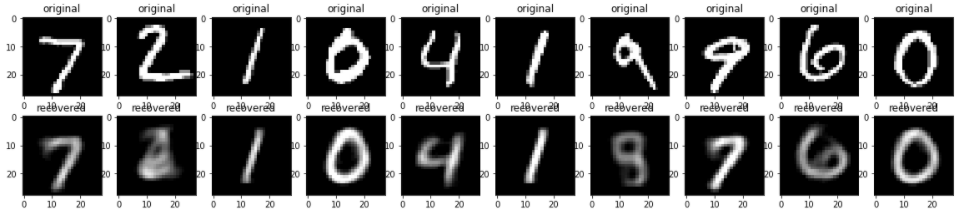
- after training 10 more epochs with LR=0.0001 (training loss $\approx$ 0.36)
    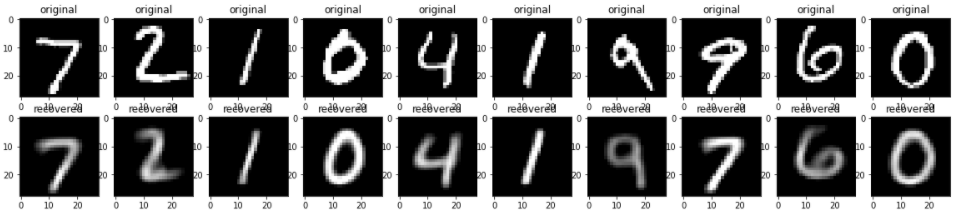
- after training 10 more epochs with LR=0.00005 (training loss $\approx$ 0.35)
    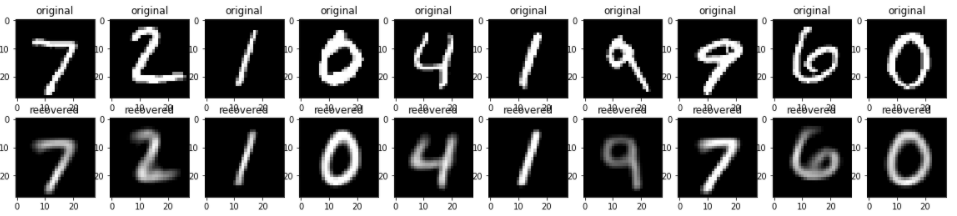

In [87]:
def test_enc_dec(ae, k_list=None):
    if k_list is None:
        k_list = [0, 1, 2, 3, 4, 5, 7, 9, 11, 13]
    n = len(k_list)
    plt.figure(figsize=(n*2,4))
    ae.eval()
    for i, (x, _) in enumerate(ae.one_loader):
        if i > max(k_list):
            break
        try:
            k = k_list.index(i)
        except ValueError as e:
            continue
        z, y = ae.forward(x)
        x = x.detach().numpy()
        y = y.detach().numpy()
        plt.subplot(2, n, k+1)
        plot_mnist_image(x*100, 'original')
        plt.subplot(2, n, k+n+1)
        plot_mnist_image(y*100, 'recovered')

In [ ]:
mlp_ae = AutoEncoder(MLP_encoder(), MLP_decoder())
mlp_ae.prepare_data(128)
mlp_ae.fit(10)

In [ ]:
test_enc_dec(mlp_ae)

#### training AutoEncoder with MLP further
- reduce learning rate to 0.0001
- reduce weight decay to 0
- train 10 epochs

In [ ]:
mlp_ae.prepare_optimizer(lr=0.0001, wd=0)
mlp_ae.fit(10)
test_enc_dec(mlp_ae)

In [ ]:
mlp_ae.prepare_optimizer(lr=0.00005, wd=0)
mlp_ae.fit(10)
test_enc_dec(mlp_ae)

## 10-3. AutoEncoder with CNN
### 10-3-1. CNN_encoder
- conv_block : input(1x28x28) $\mapsto$ output(32x3x3)
    * Conv2d :  1 channel input $\mapsto$ 8 channel output
        * kernel size = 3x3
        * stride=2 $\mapsto$ half-sized output
    * ReLU
    * Conv2d : 8 channel input $\mapsto$ 16 channel output
    * BatchNorm2d
    * ReLU
    * Conv2d : 16 channel input $\mapsto$ 32 channel output
    * ReLU
- flatten : flatten 32x3x3 $\mapsto$ 288 
- fc_block : 2 fully connected layers (288 $\mapsto$ 128 $\mapsto$ out_dim)
    * Linear : 288 $\mapsto$ 128 
    * ReLu
    * Linear : 128 $\mapsto$ out_dim

In [56]:
class CNN_encoder(nn.Module):

    def __init__(self, out_dim):
        super().__init__()
        ### Convolutional section
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=0),
            nn.ReLU(True)
        )
        self.flatten = nn.Flatten(start_dim=1)
        m_dim = 128
        self.fc_block = nn.Sequential(
            nn.Linear(3 * 3 * 32, m_dim),
            nn.ReLU(True),
            nn.Linear(m_dim, out_dim)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = self.flatten(x)
        x = self.fc_block(x)
        return x

### 10-3-2. CNN_decoder : reversed order of CNN_encoder
- fc_block : 2 fully connected layers (in_dim $\mapsto$ 128 $\mapsto$ 288)
    * Linear : in_dim $\mapsto$ 128 
    * ReLu
    * Linear : 128 $\mapsto$ 288
- unflatten : unflatten 288 $\mapsto$ 32x3x3  
- conv_block : input(1x28x28) $\mapsto$ output(32x3x3)
    * ConvTranspose2d :  32 channel input $\mapsto$ 16 channel output
        * kernel size = 3x3
        * stride=2 $\mapsto$ double-sized output
    * BatchNorm2d
    * ReLU
    * ConvTranspose2d : 16 channel input $\mapsto$ 8 channel output
    * BatchNorm2d
    * ReLU
    * ConvTranspose2d : 8 channel input $\mapsto$ 1 channel output


In [57]:
class CNN_decoder(nn.Module):

    def __init__(self, in_dim):
        super().__init__()
        m_dim = 128
        self.fc_block = nn.Sequential(
            nn.Linear(in_dim, m_dim),
            nn.ReLU(True),
            nn.Linear(m_dim, 3 * 3 * 32),
            nn.ReLU(True)
        )
        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(32, 3, 3))
        self.conv_block = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1, output_padding=1)
        )

    def forward(self, x):
        x = self.fc_block(x)
        x = self.unflatten(x)
        x = self.conv_block(x)
        # x = torch.sigmoid(x)
        return x

### 10-3-3. Testing CNN AutoEncoder
- much clearer reconstructed image
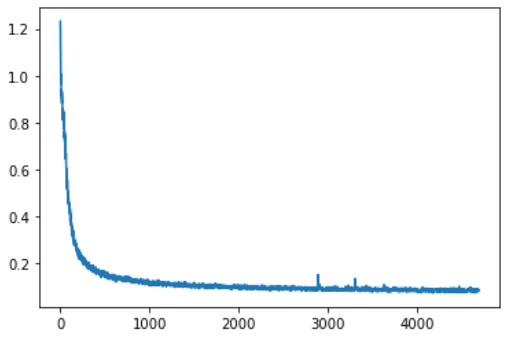
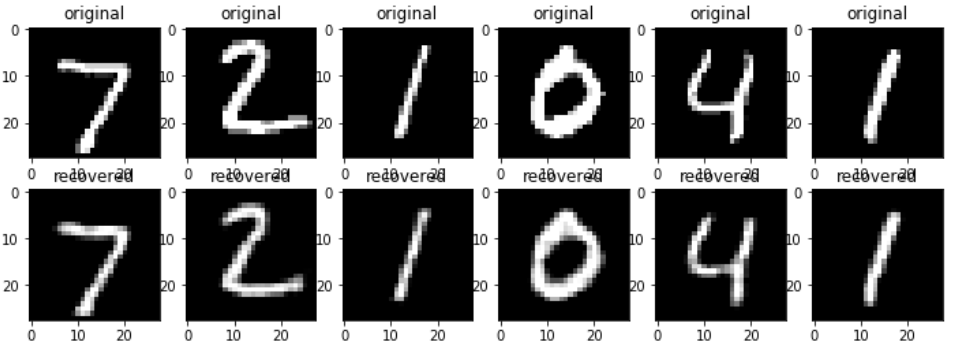

In [ ]:
dim = 32
cnn_ae = AutoEncoder(CNN_encoder(dim), CNN_decoder(dim))
cnn_ae.prepare_data(128)
cnn_ae.fit(10)


In [ ]:
test_enc_dec(cnn_ae)

### 10-3-4. Reducing dimension extremely
- What will happen if we reduce enconding dimension extremely?
    * Can we recover original image from encodings of very low dim?
- Let's reduce to dim = 2

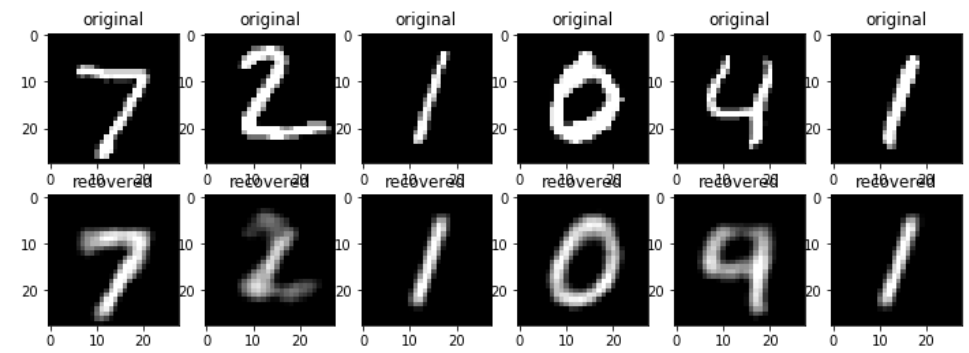

In [ ]:
dim = 2
cae2 = AutoEncoder(CNN_encoder(dim), CNN_decoder(dim))
cae2.prepare_data(128)
cae2.fit(10)
test_enc_dec(cae2)

### 10-3-5. Displaying 2-dim encoding 
- some overlappings : ambiguous area
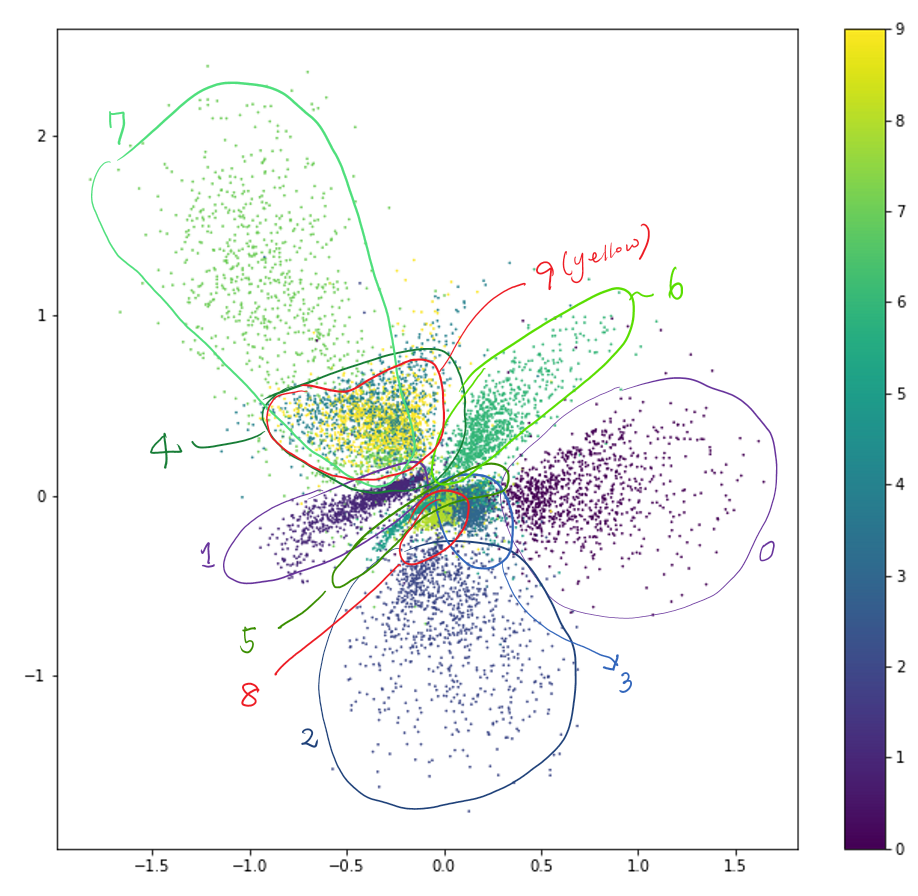

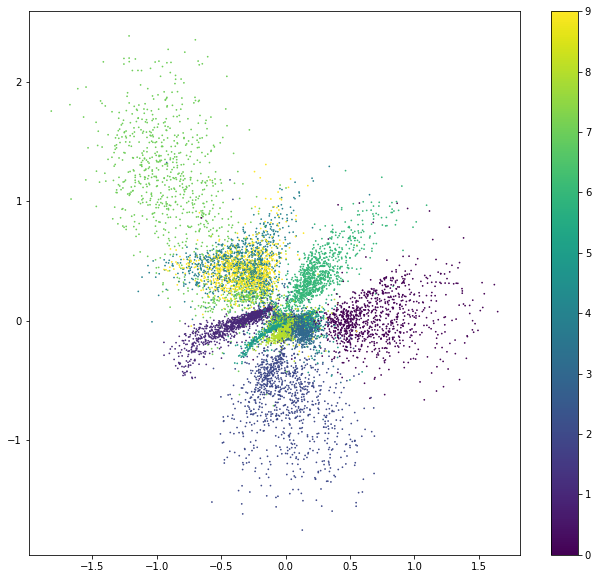

In [70]:
def plot_latent(ae):
    z_list = []
    t_list = []
    ae.eval()
    for x, t in ae.test_loader:
        z = ae.encoder(x)
        z_list.append(z.detach().numpy())
        t_list.append(t.detach().numpy())
    Z = np.concatenate(z_list, axis=0)
    T = np.concatenate(t_list, axis=0, dtype='int')
    # T = (T == 0)
    plt.figure(figsize=(11,10))
    plt.scatter(Z[:,0], Z[:,1], c=T, s=0.5)
    plt.colorbar()

plot_latent(cae2)